In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
pd.__version__

'2.0.3'

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
len(df)

9704

In [4]:
df['fuel_type'].unique()

array(['Gasoline', 'Diesel'], dtype=object)

In [5]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [6]:
df.isnull().sum().sum()

2622

In [7]:
empty_rows_mask = df.isna().all(axis=1)
empty_rows_mask.sum()

0

In [8]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [9]:
df_asia = df[df['origin'] == 'Asia']
df_asia['fuel_efficiency_mpg'].max()

23.759122836520497

In [10]:
df['horsepower'].median()

149.0

In [11]:
df['horsepower'].mode()[0]

152.0

In [12]:
df_rm_na = df['horsepower'].fillna(df['horsepower'].mode()[0])
df_rm_na.median()

152.0

In [13]:
df_asia.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
12,320,5.0,145.0,2783.868974,15.1,2010,Asia,Diesel,All-wheel drive,1.0,16.175820
14,200,6.0,160.0,3582.687368,14.9,2007,Asia,Diesel,All-wheel drive,0.0,11.871091
20,150,3.0,197.0,2231.808142,18.7,2011,Asia,Gasoline,Front-wheel drive,1.0,18.889083
21,160,4.0,133.0,2659.431451,NaN,2016,Asia,Gasoline,Front-wheel drive,-1.0,16.077730


In [14]:
df_asia[['vehicle_weight', 'model_year']].head(7)

,vehicle_weight,model_year
8,2714.219310,2016
12,2783.868974,2010
14,3582.687368,2007
20,2231.808142,2011
21,2659.431451,2016
34,2844.227534,2014
38,3761.994038,2019


In [15]:
df_asia_7 = df_asia[['vehicle_weight', 'model_year']].head(7)

In [16]:
X = df_asia_7.to_numpy()
X

array([[2714.21930965, 2016.        ],
       [2783.86897424, 2010.        ],
       [3582.68736772, 2007.        ],
       [2231.8081416 , 2011.        ],
       [2659.43145076, 2016.        ],
       [2844.22753389, 2014.        ],
       [3761.99403819, 2019.        ]])

In [17]:
XTX = X.T @ X
XTX

array([[62248334.33150762, 41431216.5073268 ],
       [41431216.5073268 , 28373339.        ]])

In [22]:
y = [1100, 1300, 800, 900, 1000, 1100, 1200]
XTX_inv_XT = inv(XTX) @ X.T
XTX_inv_XT

array([[-1.31202622e-04, -8.63909858e-05,  3.72634923e-04,
        -4.02726650e-04, -1.62513724e-04, -5.52342829e-05,
         4.65094049e-04],
       [ 2.62636846e-04,  1.96990690e-04, -4.73392228e-04,
         6.58944477e-04,  3.08357831e-04,  1.51636137e-04,
        -6.07979633e-04]])

<Axes: >

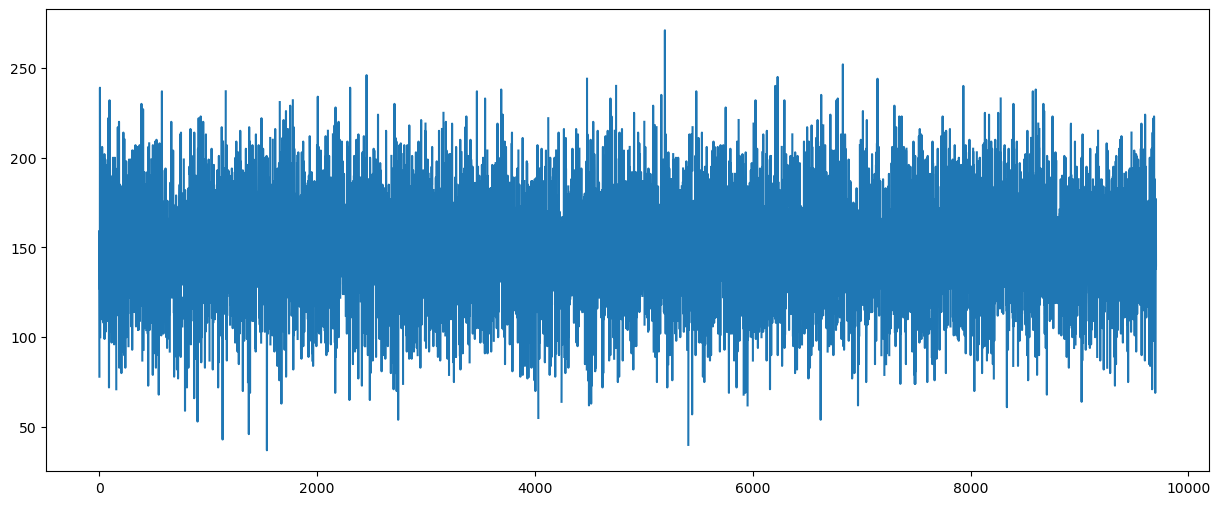

In [19]:
df['horsepower'].plot(kind='line', figsize=(15, 6))

<Axes: ylabel='Frequency'>

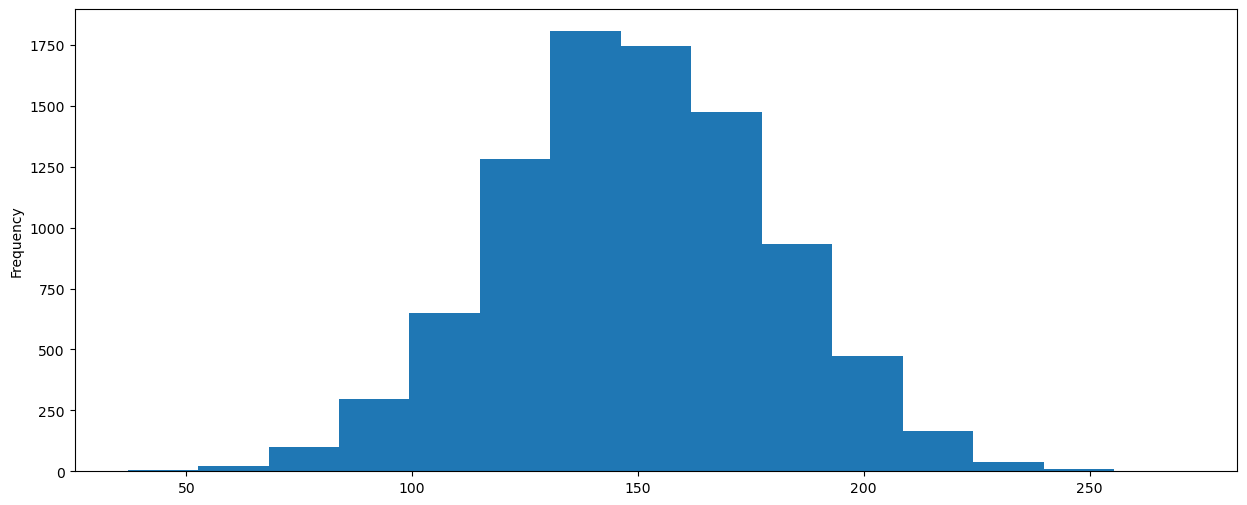

In [20]:
df['horsepower'].plot(kind='hist', figsize=(15, 6), bins=15)

In [21]:
df['vehicle_weight'].sum()

29124430.759692904